### Graph Gen

In [8]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  
from utils.eap_utils import run_eap_kl, run_metrics, load_adapter_into_hooked_transformer
import gc
import torch
from eap.graph import Graph

In [9]:
model_name = 'EleutherAI/pythia-1.4b-deduped'
scratch_cache_dir = "/mnt/faster0/rje41/.cache/huggingface"   
transformer_lens_name = "pythia-1.4B-deduped" 
n = 6

In [ ]:
checkpoint_folder = 'checkpoints/prompt_id_0/checkpoint-500'
valid_file_csv = 'datasets_csv/prompts_id_0/test.csv'

graph_0, _ = run_eap_kl(checkpoint_folder, model_name, transformer_lens_name, scratch_cache_dir, valid_file_csv, n)
graph_0.to_json('graph_prompt_0')

del graph_0
del _
torch.cuda.empty_cache()
gc.collect()

Loaded pretrained model pythia-1.4B-deduped into HookedTransformer


100%|██████████| 84/84 [06:11<00:00,  4.43s/it]


914250

In [3]:
checkpoint_folder = 'checkpoints/prompt_id_1/checkpoint-500'
valid_file_csv = 'datasets_csv/prompts_id_1/test.csv'

graph_0, _ = run_eap_kl(checkpoint_folder, model_name, transformer_lens_name, scratch_cache_dir, valid_file_csv, n)
graph_0.to_json('graph_prompt_1.json')

del graph_0
del _
torch.cuda.empty_cache()
gc.collect()

Loaded pretrained model pythia-1.4B-deduped into HookedTransformer


100%|██████████| 84/84 [06:08<00:00,  4.38s/it]


914250

### Ablate Non-circuit edges

In [4]:
checkpoint_folder = 'checkpoints/prompt_id_0/checkpoint-500'
valid_file_csv = 'datasets_csv/prompts_id_0/test.csv'
graph_0 = Graph.from_json('graph_prompt_0.json')
model_0 = load_adapter_into_hooked_transformer(adapter_path = checkpoint_folder,
                                    hf_model_name = model_name,
                                    translens_model_name = transformer_lens_name, 
                                    adapter = True, 
                                    scratch_cache_dir = scratch_cache_dir)
data, graph_0 = run_metrics(g = graph_0,
                      percentage_prune = 0.05,
                      model = model_0,
                      valid_file_csv = valid_file_csv,
                      loader_n = n)

del graph_0
del model_0
torch.cuda.empty_cache()
gc.collect()

Loaded pretrained model pythia-1.4B-deduped into HookedTransformer


100%|██████████| 84/84 [01:13<00:00,  1.14it/s]


Baseline performance: 0.00044656594400294125
Circuit performance: 0.00042468056199140847
Faithfulness: 2.1885382011532784e-05
Percentage of model performance achieved by the circuit: 95.10%


100%|██████████| 84/84 [00:54<00:00,  1.55it/s]


Baseline accuracy: 0.9559999704360962
Circuit accuracy: 0.8980000019073486


914246

In [5]:
checkpoint_folder = 'checkpoints/prompt_id_1/checkpoint-500'
valid_file_csv = 'datasets_csv/prompts_id_1/test.csv'
graph_1 = Graph.from_json('graph_prompt_1.json')
model_1 = load_adapter_into_hooked_transformer(adapter_path = checkpoint_folder,
                                    hf_model_name = model_name,
                                    translens_model_name = transformer_lens_name, 
                                    adapter = True, 
                                    scratch_cache_dir = scratch_cache_dir)

data, graph_1 = run_metrics(g = graph_1,
            percentage_prune = 0.05,
            model = model_1,
            valid_file_csv = valid_file_csv,
            loader_n = n)

del graph_1
del model_1
torch.cuda.empty_cache()
gc.collect()

Loaded pretrained model pythia-1.4B-deduped into HookedTransformer


100%|██████████| 84/84 [01:06<00:00,  1.26it/s]


Baseline performance: 0.0004544600669760257
Circuit performance: 0.0004235731321386993
Faithfulness: 3.088693483732641e-05
Percentage of model performance achieved by the circuit: 93.20%


100%|██████████| 84/84 [00:46<00:00,  1.82it/s]


Baseline accuracy: 0.9459999799728394
Circuit accuracy: 0.8460000157356262


914218

### Ablate Circuit Edges

### Prompt 0

In [3]:
graph_0 = Graph.from_json('graph_prompt_0.json')
total_edges = len(graph_0.edges)
percent_edges = int(total_edges * 0.05)
graph_0.apply_topn(percent_edges , absolute=True, prune=True)

for edge in graph_0.edges.values():
    edge.in_graph = not edge.in_graph
graph_0.prune()

In [ ]:
checkpoint_folder = 'checkpoints/prompt_id_0/checkpoint-500'
valid_file_csv = 'datasets_csv/prompts_id_0/test.csv'
model_0 = load_adapter_into_hooked_transformer(adapter_path = checkpoint_folder,
                                    hf_model_name = model_name,
                                    translens_model_name = transformer_lens_name, 
                                    adapter = True, 
                                    scratch_cache_dir = scratch_cache_dir)
data, graph_0 = run_metrics(g = graph_0,
                      percentage_prune = None,
                      model = model_0,
                      valid_file_csv = valid_file_csv,
                      loader_n = n)

del graph_0
del model_0
torch.cuda.empty_cache()
gc.collect()

Loaded pretrained model pythia-1.4B-deduped into HookedTransformer


100%|██████████| 84/84 [01:03<00:00,  1.33it/s]


Baseline performance: 0.00044656594400294125
Circuit performance: 2.048040487201419e-10
Faithfulness: 0.00044656573919889253
Percentage of model performance achieved by the circuit: 0.00%


100%|██████████| 84/84 [00:46<00:00,  1.81it/s]

Baseline accuracy: 0.9559999704360962
Circuit accuracy: 0.01600000075995922


### Prompt 1

In [3]:
graph_1 = Graph.from_json('graph_prompt_1.json')
total_edges = len(graph_1.edges)
percent_edges = int(total_edges * 0.05)
graph_1.apply_topn(percent_edges , absolute=True, prune=True)

for edge in graph_1.edges.values():
    edge.in_graph = not edge.in_graph
graph_1.prune()

In [6]:
checkpoint_folder = 'checkpoints/prompt_id_1/checkpoint-500'
valid_file_csv = 'datasets_csv/prompts_id_1/test.csv'
model_1 = load_adapter_into_hooked_transformer(adapter_path = checkpoint_folder,
                                    hf_model_name = model_name,
                                    translens_model_name = transformer_lens_name, 
                                    adapter = True, 
                                    scratch_cache_dir = scratch_cache_dir)
data, graph_1 = run_metrics(g = graph_1,
                      percentage_prune = None,
                      model = model_1,
                      valid_file_csv = valid_file_csv,
                      loader_n = n)
del graph_1
del model_1
torch.cuda.empty_cache()
gc.collect()

Loaded pretrained model pythia-1.4B-deduped into HookedTransformer


100%|██████████| 84/84 [00:57<00:00,  1.46it/s]


Baseline performance: 0.0004544600669760257
Circuit performance: 7.251293315801988e-11
Faithfulness: 0.00045445999446309254
Percentage of model performance achieved by the circuit: 0.00%


100%|██████████| 84/84 [00:42<00:00,  1.98it/s]

Baseline accuracy: 0.9459999799728394
Circuit accuracy: 0.00800000037997961


### Find overlap circuits

In [ ]:
graph_0 = Graph.from_json('graph_prompt_0.json')
total_edges = len(graph_0.edges)
percent_edges = int(total_edges * 0.05)
graph_0.apply_topn(percent_edges , absolute=True, prune=True)

graph_1 = Graph.from_json('graph_prompt_1.json')
total_edges = len(graph_1.edges)
percent_edges = int(total_edges * 0.05)
graph_1.apply_topn(percent_edges , absolute=True, prune=True)

In [13]:
edges_0 = {name for name, edge in graph_0.edges.items() if edge.in_graph}
edges_1 = {name for name, edge in graph_1.edges.items() if edge.in_graph}

overlapping_edges = edges_0 & edges_1
print(f"Number of overlapping in-graph edges: {len(overlapping_edges)}")

Number of overlapping in-graph edges: 6532


In [17]:
# Edges in top-5 but not in overlapping
for name, edge in graph_0.edges.items():
    if edge.in_graph:
        if name in overlapping_edges:
            edge.in_graph = False
        else:
            edge.in_graph = True 
    else:
        edge.in_graph = False  
graph_0.prune()

In [18]:
#top5 edges- no overlap
checkpoint_folder = 'checkpoints/prompt_id_0/checkpoint-500'
valid_file_csv = 'datasets_csv/prompts_id_0/test.csv'
model_0 = load_adapter_into_hooked_transformer(adapter_path = checkpoint_folder,
                                    hf_model_name = model_name,
                                    translens_model_name = transformer_lens_name, 
                                    adapter = True, 
                                    scratch_cache_dir = scratch_cache_dir)
data, graph_0 = run_metrics(g = graph_0,
                            percentage_prune = None,
                            model = model_0,
                            valid_file_csv = valid_file_csv,
                            loader_n = n)

del graph_0
del model_0
torch.cuda.empty_cache()
gc.collect()

Loaded pretrained model pythia-1.4B-deduped into HookedTransformer


100%|██████████| 84/84 [02:14<00:00,  1.60s/it]


Baseline performance: 0.00044656594400294125
Circuit performance: 1.6808611794094652e-11
Faithfulness: 0.00044656592719432946
Percentage of model performance achieved by the circuit: 0.00%


100%|██████████| 84/84 [01:37<00:00,  1.16s/it]


Baseline accuracy: 0.9559999704360962
Circuit accuracy: 0.01600000075995922


1828436

In [3]:
graph_0 = Graph.from_json('graph_prompt_0.json')
total_edges = len(graph_0.edges)
percent_edges = int(total_edges * 0.05)
graph_0.apply_topn(percent_edges , absolute=True, prune=True)

graph_1 = Graph.from_json('graph_prompt_1.json')
total_edges = len(graph_1.edges)
percent_edges = int(total_edges * 0.05)
graph_1.apply_topn(percent_edges , absolute=True, prune=True)

edges_0 = {name for name, edge in graph_0.edges.items() if edge.in_graph}
edges_1 = {name for name, edge in graph_1.edges.items() if edge.in_graph}

overlapping_edges = edges_0 & edges_1
print(f"Number of overlapping in-graph edges: {len(overlapping_edges)}")

Number of overlapping in-graph edges: 6532


In [4]:
#Edges in top-5 and Overlapping 
for name, edge in graph_0.edges.items():
    if edge.in_graph:
        if name in overlapping_edges:
            edge.in_graph = True
        else:
            edge.in_graph = False 
    else:
        edge.in_graph = False  
graph_0.prune()

In [5]:
#Edges in top-5 and Overlapping 
checkpoint_folder = 'checkpoints/prompt_id_0/checkpoint-500'
valid_file_csv = 'datasets_csv/prompts_id_0/test.csv'
model_0 = load_adapter_into_hooked_transformer(adapter_path = checkpoint_folder,
                                    hf_model_name = model_name,
                                    translens_model_name = transformer_lens_name, 
                                    adapter = True, 
                                    scratch_cache_dir = scratch_cache_dir)
data, graph_0 = run_metrics(g = graph_0,
                            percentage_prune = None,
                            model = model_0,
                            valid_file_csv = valid_file_csv,
                            loader_n = n)

del graph_0
del model_0
torch.cuda.empty_cache()
gc.collect()

Loaded pretrained model pythia-1.4B-deduped into HookedTransformer


100%|██████████| 84/84 [02:14<00:00,  1.60s/it]


Baseline performance: 0.00044656594400294125
Circuit performance: 0.00040748732862994075
Faithfulness: 3.90786153730005e-05
Percentage of model performance achieved by the circuit: 91.25%


100%|██████████| 84/84 [01:37<00:00,  1.16s/it]


Baseline accuracy: 0.9559999704360962
Circuit accuracy: 0.8199999928474426


20

In [6]:
graph_0 = Graph.from_json('graph_prompt_0.json')
graph_0.apply_topn(len(overlapping_edges) , absolute=True, prune=True)

In [7]:
checkpoint_folder = 'checkpoints/prompt_id_0/checkpoint-500'
valid_file_csv = 'datasets_csv/prompts_id_0/test.csv'
model_0 = load_adapter_into_hooked_transformer(adapter_path = checkpoint_folder,
                                    hf_model_name = model_name,
                                    translens_model_name = transformer_lens_name, 
                                    adapter = True, 
                                    scratch_cache_dir = scratch_cache_dir)
data, graph_0 = run_metrics(g = graph_0,
                            percentage_prune = None,
                            model = model_0,
                            valid_file_csv = valid_file_csv,
                            loader_n = n)

del graph_0
del model_0
torch.cuda.empty_cache()
gc.collect()

Loaded pretrained model pythia-1.4B-deduped into HookedTransformer


100%|██████████| 84/84 [02:16<00:00,  1.63s/it]


Baseline performance: 0.00044656594400294125
Circuit performance: 0.0004129871667828411
Faithfulness: 3.3578777220100164e-05
Percentage of model performance achieved by the circuit: 92.48%


100%|██████████| 84/84 [01:39<00:00,  1.19s/it]


Baseline accuracy: 0.9559999704360962
Circuit accuracy: 0.8140000104904175


914218

In [10]:
graph_1 = Graph.from_json('graph_prompt_0.json')
graph_1.apply_topn(len(overlapping_edges) , absolute=True, prune=True)

In [17]:
checkpoint_folder = 'checkpoints/prompt_id_1/checkpoint-500'
valid_file_csv = 'datasets_csv/prompts_id_1/test.csv'
model_1 = load_adapter_into_hooked_transformer(adapter_path = checkpoint_folder,
                                    hf_model_name = model_name,
                                    translens_model_name = transformer_lens_name, 
                                    adapter = True, 
                                    scratch_cache_dir = scratch_cache_dir)

Loaded pretrained model pythia-1.4B-deduped into HookedTransformer


In [18]:
data, graph_1 = run_metrics(g = graph_1,
                            percentage_prune = None,
                            model = model_1,
                            valid_file_csv = valid_file_csv,
                            loader_n = n)

del graph_1
torch.cuda.empty_cache()
gc.collect()

100%|██████████| 84/84 [02:03<00:00,  1.47s/it]


Baseline performance: 0.0004544600669760257
Circuit performance: 0.00039523487794212997
Faithfulness: 5.922518903389573e-05
Percentage of model performance achieved by the circuit: 86.97%


100%|██████████| 84/84 [01:29<00:00,  1.07s/it]


Baseline accuracy: 0.9459999799728394
Circuit accuracy: 0.6600000262260437


917982

In [19]:
graph_0 = Graph.from_json('graph_prompt_0.json')
total_edges = len(graph_0.edges)
percent_edges = int(total_edges * 0.05)
graph_0.apply_topn(percent_edges , absolute=True, prune=True)

graph_1 = Graph.from_json('graph_prompt_1.json')
total_edges = len(graph_1.edges)
percent_edges = int(total_edges * 0.05)
graph_1.apply_topn(percent_edges , absolute=True, prune=True)

edges_0 = {name for name, edge in graph_0.edges.items() if edge.in_graph}
edges_1 = {name for name, edge in graph_1.edges.items() if edge.in_graph}

overlapping_edges = edges_0 & edges_1
print(f"Number of overlapping in-graph edges: {len(overlapping_edges)}")

Number of overlapping in-graph edges: 6532


In [20]:
#Edges in top-5 and Overlapping 
for name, edge in graph_1.edges.items():
    if edge.in_graph:
        if name in overlapping_edges:
            edge.in_graph = True
        else:
            edge.in_graph = False 
    else:
        edge.in_graph = False  
graph_1.prune()

In [21]:
data, graph_1 = run_metrics(g = graph_1,
                            percentage_prune = None,
                            model = model_1,
                            valid_file_csv = valid_file_csv,
                            loader_n = n)

del graph_1
del model_1
torch.cuda.empty_cache()
gc.collect()

100%|██████████| 84/84 [02:04<00:00,  1.48s/it]


Baseline performance: 0.0004544600669760257
Circuit performance: 0.0004001743218395859
Faithfulness: 5.42857451364398e-05
Percentage of model performance achieved by the circuit: 88.05%


100%|██████████| 84/84 [01:32<00:00,  1.10s/it]


Baseline accuracy: 0.9459999799728394
Circuit accuracy: 0.699999988079071


914218

In [22]:
graph_1 = Graph.from_json('graph_prompt_1.json')
total_edges = len(graph_1.edges)
percent_edges = int(total_edges * 0.05)
graph_1.apply_topn(percent_edges , absolute=True, prune=True)


In [24]:
model_1 = load_adapter_into_hooked_transformer(adapter_path = checkpoint_folder,
                                    hf_model_name = model_name,
                                    translens_model_name = transformer_lens_name, 
                                    adapter = True, 
                                    scratch_cache_dir = scratch_cache_dir)
data, graph_1 = run_metrics(g = graph_1,
                            percentage_prune = None,
                            model = model_1,
                            valid_file_csv = valid_file_csv,
                            loader_n = n)

del graph_1
del model_1
torch.cuda.empty_cache()
gc.collect()

Loaded pretrained model pythia-1.4B-deduped into HookedTransformer


100%|██████████| 84/84 [02:03<00:00,  1.47s/it]


Baseline performance: 0.0004544600669760257
Circuit performance: 0.0004235731321386993
Faithfulness: 3.088693483732641e-05
Percentage of model performance achieved by the circuit: 93.20%


100%|██████████| 84/84 [01:29<00:00,  1.06s/it]


Baseline accuracy: 0.9459999799728394
Circuit accuracy: 0.8460000157356262


1828901

In [32]:
graph_1 = Graph.from_json('graph_prompt_1.json')
total_edges = len(graph_1.edges)
percent_edges = int(total_edges * 0.05)
graph_1.apply_topn(percent_edges , absolute=True, prune=True)

In [38]:
sample_size = len(overlapping_edges)

In [39]:
import random 
sample_size = len(overlapping_edges)
in_graph_edge_names = [name for name, edge in graph_1.edges.items() if edge.in_graph]
random_sample = set(random.sample(in_graph_edge_names, sample_size))

In [40]:
for name, edge in graph_1.edges.items():
    edge.in_graph = name in random_sample

graph_1.prune()

In [41]:
model_1 = load_adapter_into_hooked_transformer(adapter_path = checkpoint_folder,
                                    hf_model_name = model_name,
                                    translens_model_name = transformer_lens_name, 
                                    adapter = True, 
                                    scratch_cache_dir = scratch_cache_dir)
data, graph_1 = run_metrics(g = graph_1,
                            percentage_prune = None,
                            model = model_1,
                            valid_file_csv = valid_file_csv,
                            loader_n = n)

del graph_1
del model_1
torch.cuda.empty_cache()
gc.collect()

Loaded pretrained model pythia-1.4B-deduped into HookedTransformer


100%|██████████| 84/84 [02:05<00:00,  1.49s/it]


Baseline performance: 0.0004544600669760257
Circuit performance: 1.900689198919281e-06
Faithfulness: 0.0004525593777771064
Percentage of model performance achieved by the circuit: 0.42%


100%|██████████| 84/84 [01:31<00:00,  1.10s/it]


Baseline accuracy: 0.9459999799728394
Circuit accuracy: 0.00800000037997961


1829127

In [43]:
graph_0 = Graph.from_json('graph_prompt_0.json')
total_edges = len(graph_0.edges)
percent_edges = int(total_edges * 0.05)
graph_0.apply_topn(percent_edges , absolute=True, prune=True)

graph_1 = Graph.from_json('graph_prompt_1.json')
total_edges = len(graph_1.edges)
percent_edges = int(total_edges * 0.05)
graph_1.apply_topn(percent_edges , absolute=True, prune=True)

edges_0 = {name for name, edge in graph_0.edges.items() if edge.in_graph}
edges_1 = {name for name, edge in graph_1.edges.items() if edge.in_graph}

overlapping_edges = edges_0 & edges_1
print(f"Number of overlapping in-graph edges: {len(overlapping_edges)}")

Number of overlapping in-graph edges: 6532


In [53]:
graph_1_sub = Graph.from_json('graph_prompt_1.json')
graph_1_sub.apply_topn(len(overlapping_edges) , absolute=True, prune=True)


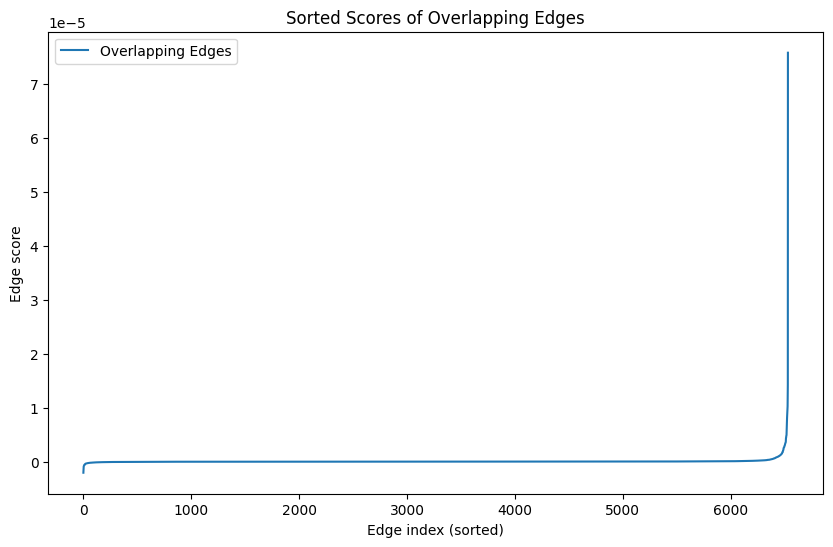

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Separate scores
overlap_scores = [edge.score for name, edge in graph_1_sub.edges.items() if name in overlapping_edges]

# Sort the scores
overlap_scores_sorted = sorted(overlap_scores)

# Plot the sorted scores
plt.figure(figsize=(10,6))
plt.plot(overlap_scores_sorted, label='Overlapping Edges')
plt.title('Sorted Scores of Overlapping Edges')
plt.xlabel('Edge index (sorted)')
plt.ylabel('Edge score')
plt.legend()
plt.show()

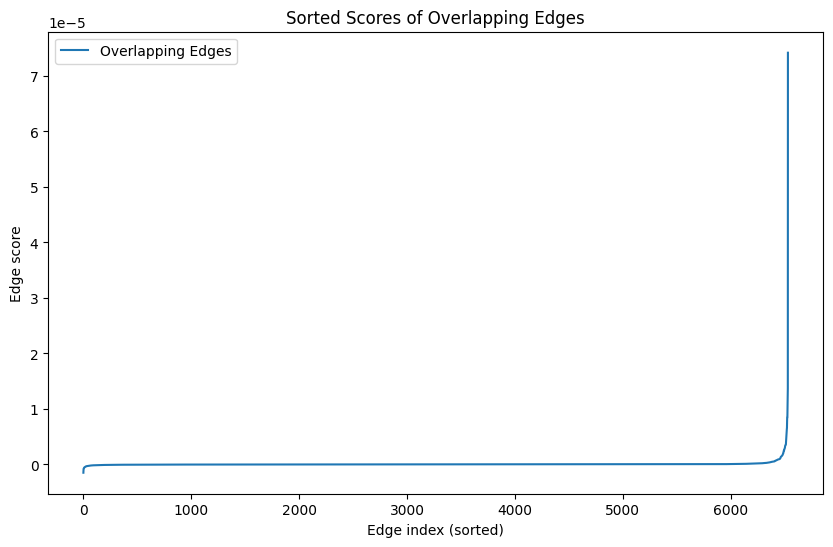

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns


# Separate scores
overlap_scores = [edge.score for name, edge in graph_1_sub.edges.items() if name in overlapping_edges]

# Sort the scores
overlap_scores_sorted = sorted(overlap_scores)

# Plot the sorted scores
plt.figure(figsize=(10,6))
plt.plot(overlap_scores_sorted, label='Overlapping Edges')
plt.title('Sorted Scores of Overlapping Edges')
plt.xlabel('Edge index (sorted)')
plt.ylabel('Edge score')
plt.legend()
plt.show()